In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
s_dir = '/content/drive/MyDrive/Semester/8th Semester/CSE463/Lab Assignments/22301268_NowrinSanjana_Lab2/Images'
d_dir = '/content/drive/MyDrive/Semester/8th Semester/CSE463/Lab Assignments/22301268_NowrinSanjana_Lab2/Output Images'
resize_dim = (256, 256)
os.makedirs(d_dir, exist_ok = True)

In [5]:
rgb_img = []
im = []
for fname in os.listdir(s_dir):
    if fname.endswith('.jpg'):
        img_path = os.path.join(s_dir, fname)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to load {fname}.")
            continue
        resized_img = cv2.resize(img, resize_dim)
        im.append(resized_img)
        resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
        dest_path = os.path.join(d_dir, fname)
        plt.imsave(dest_path, resized_img_rgb)
        rgb_img.append(resized_img_rgb)

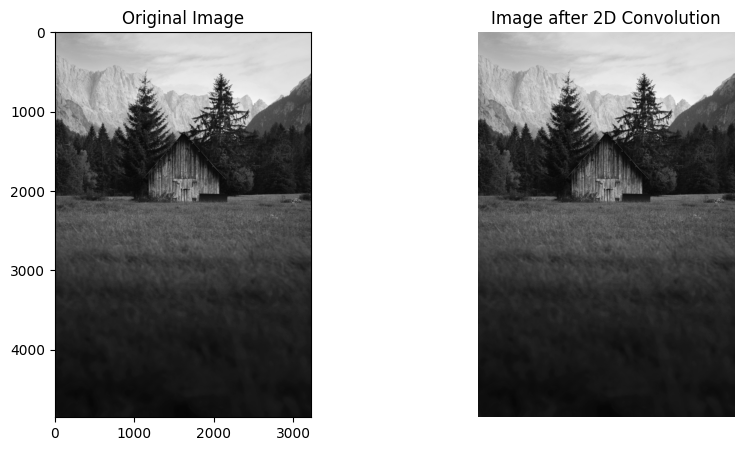

In [6]:
t1 = rgb_img[6]
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
def apply_convolution(img, kernel):
    return cv2.filter2D(img, -1, kernel)
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])
convolved_img = apply_convolution(img1, kernel)
convolved_img = apply_convolution(convolved_img, kernel)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img1, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Image after 2D Convolution")
plt.axis('off')
plt.imsave("convolved_image.jpg", convolved_img, cmap='gray')
plt.imshow(convolved_img, cmap='gray')
plt.show()

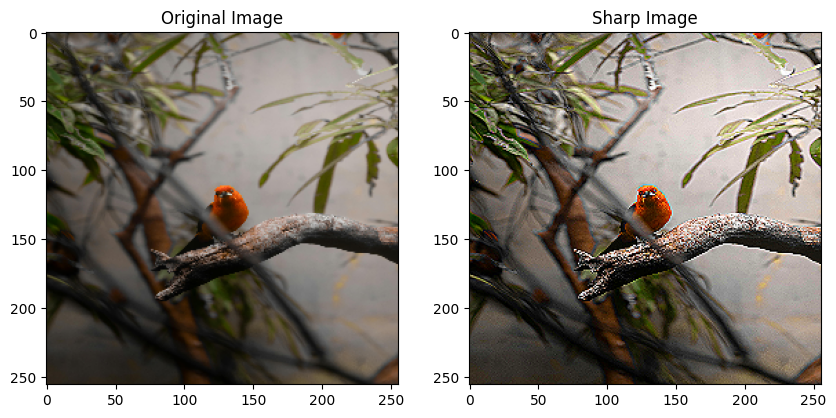

In [ ]:
img2 = rgb_img[5]
def apply_convolution(img, kernel):
    return cv2.filter2D(img, -1, kernel)
kernel_sharp = np.array([[0, -1, 0],
                   [-1, 5.2, -1],
                   [0, -1, 0]])
sharp_img = apply_convolution(img2, kernel_sharp)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imsave("Sharp_Image.jpg", sharp_img)
plt.imshow(img2, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Sharp Image")
plt.imshow(sharp_img, cmap='gray')
plt.show()

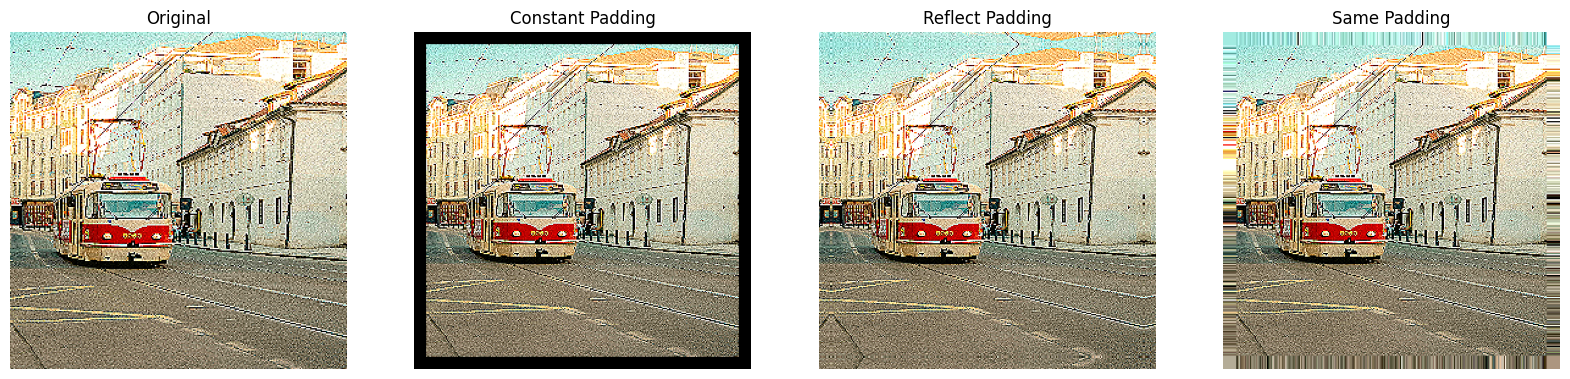

In [ ]:
img3 = rgb_img[4]
sharp_img = apply_convolution(img3, kernel_sharp)
padding_width=10
constant_padded_img = cv2.copyMakeBorder(
    sharp_img,
    padding_width, padding_width, padding_width, padding_width,
    borderType=cv2.BORDER_CONSTANT,
    value=0)

# Apply reflect padding
reflect_padded_img = cv2.copyMakeBorder(
    sharp_img,
    padding_width, padding_width, padding_width, padding_width,
    borderType=cv2.BORDER_REFLECT)

# Apply replicate padding (similar to "same" padding)
same_padded_img = cv2.copyMakeBorder(
    sharp_img,
    padding_width, padding_width, padding_width, padding_width,
    borderType=cv2.BORDER_REPLICATE)
# Display the results
plt.figure(figsize=(20, 7))
plt.subplot(1, 4, 1)
plt.title('Original')
plt.axis('off')
plt.imshow(sharp_img, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Constant Padding')
plt.axis('off')
plt.imshow(constant_padded_img, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Reflect Padding')
plt.axis('off')
plt.imshow(reflect_padded_img , cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Same Padding')
plt.axis('off')
plt.imshow(same_padded_img, cmap='gray')
plt.show()

In [8]:
def add_gaussian_noise(image, mean=0, sigma=25):
    noisy_image = image + np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    return noisy_image

(-0.5, 255.5, 255.5, -0.5)

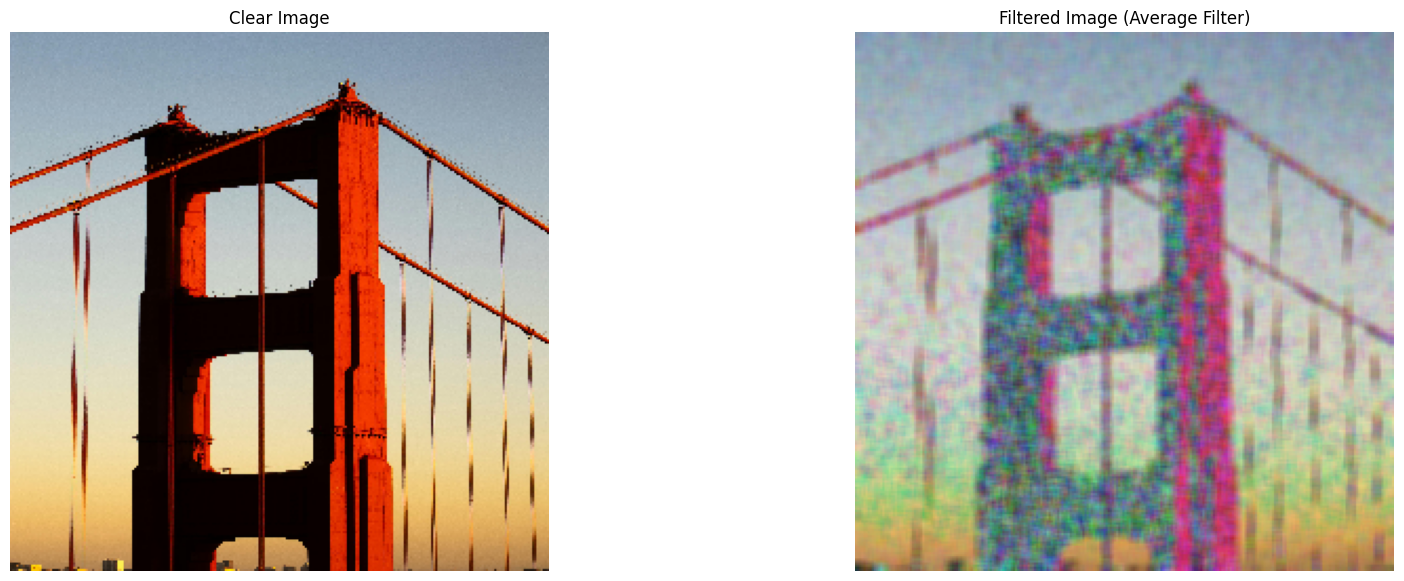

In [9]:
img4 = im[3]
# Use img4 directly for filtering:
clear_image = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
noisy_image = add_gaussian_noise(clear_image)
filtered_image = cv2.blur(noisy_image, (5, 5))
# Plotting the images
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.imshow(clear_image)
plt.title('Clear Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title('Filtered Image (Average Filter)')
plt.axis('off')

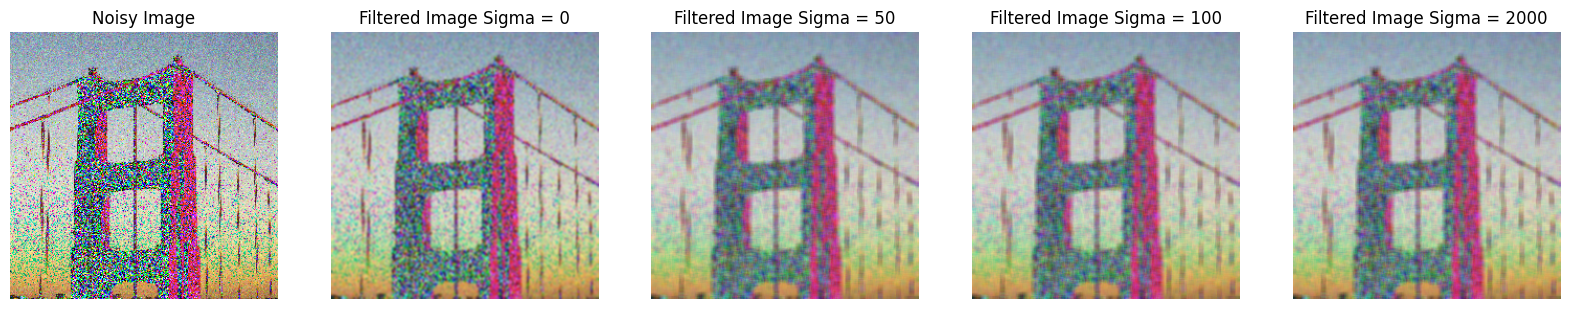

In [11]:
# Convert from BGR to RGB
filtered_image = cv2.GaussianBlur(noisy_image, (5, 5), sigmaX=0)
filtered_image1 = cv2.GaussianBlur(noisy_image, (5, 5), sigmaX=50)
filtered_image2 = cv2.GaussianBlur(noisy_image, (5, 5), sigmaX=100)
filtered_image3 = cv2.GaussianBlur(noisy_image, (5, 5), sigmaX=2000)

# Plotting the images
plt.figure(figsize=(20, 7))

plt.subplot(1, 5, 1)
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(filtered_image)
plt.title('Filtered Image Sigma = 0')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(filtered_image1)
plt.title('Filtered Image Sigma = 50')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(filtered_image2)
plt.title('Filtered Image Sigma = 100')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(filtered_image3)
plt.title('Filtered Image Sigma = 2000')
plt.axis('off')

plt.show()

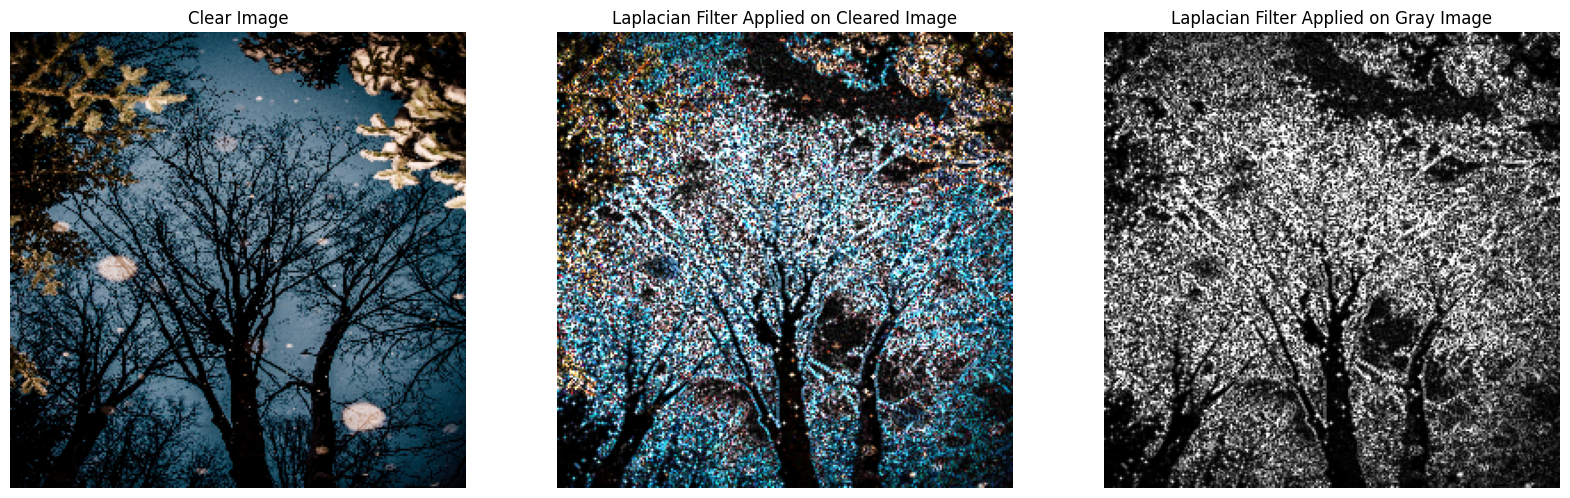

In [12]:
img5 = im[2]
clear_image = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
laplacian_filtered_image1 = cv2.Laplacian(clear_image, cv2.CV_64F)  # Use 64F to handle negative values
laplacian_filtered_image1 = cv2.convertScaleAbs(laplacian_filtered_image1)  # Convert back to 8-bit

clear_image_gray = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
laplacian_filtered_image2 = cv2.Laplacian(clear_image_gray, cv2.CV_64F)  # Use 64F to handle negative values
laplacian_filtered_image2 = cv2.convertScaleAbs(laplacian_filtered_image2)
# Plotting the images
plt.figure(figsize=(20, 7))

plt.subplot(1, 3, 1)
plt.imshow(clear_image, cmap='gray')
plt.title('Clear Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_filtered_image1, cmap='gray')
plt.title('Laplacian Filter Applied on Cleared Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(laplacian_filtered_image2, cmap='gray')
plt.title('Laplacian Filter Applied on Gray Image')
plt.axis('off')

plt.show()

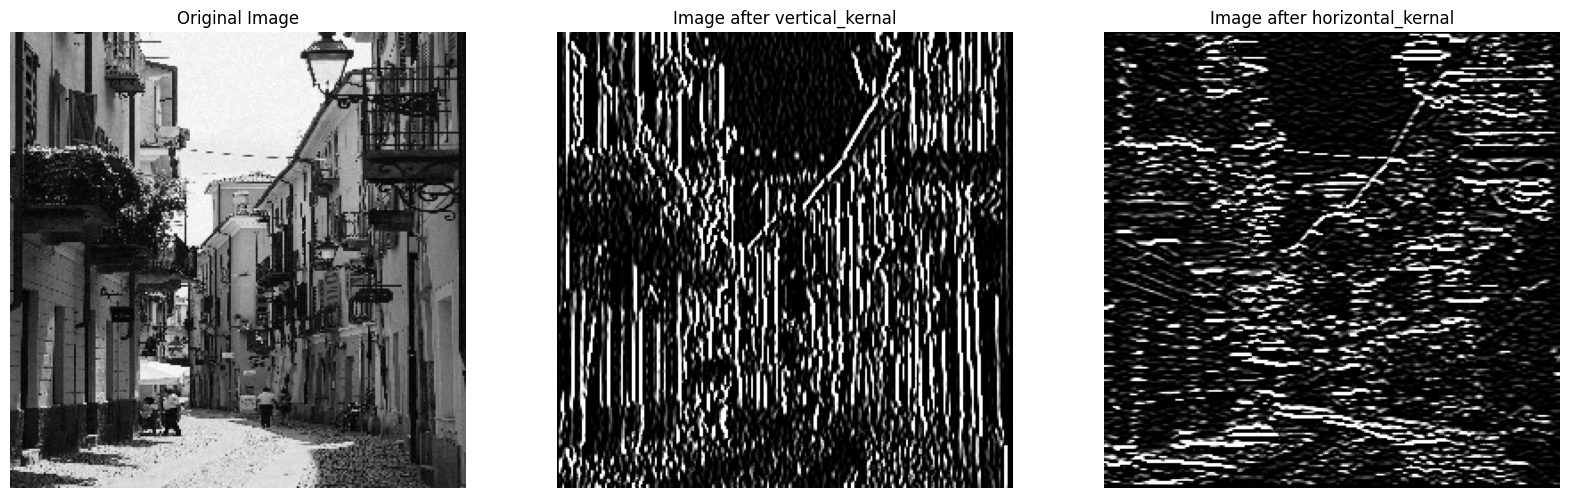

In [15]:
img6 = im[1]
clear_image = cv2.cvtColor(img6, cv2.COLOR_BGR2GRAY)

# Define a Laplacian horizontal_kernal (3x3)
vertical_kernal = np.array([[-1,0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]])

convolved_img1 = apply_convolution(clear_image, vertical_kernal)

convolved_img1 = apply_convolution(convolved_img1, vertical_kernal)


horizontal_kernal = np.array([[-1,-1, -1],
                             [0, 0, 0],
                             [1, 1, 1]])

convolved_img2 = apply_convolution(clear_image, horizontal_kernal)

convolved_img2 = apply_convolution(convolved_img2, horizontal_kernal)

# Plot the original and convolved images
plt.figure(figsize=(20, 7))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.axis('off')
plt.imshow(clear_image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Image after vertical_kernal")
plt.axis('off')
plt.imshow(convolved_img1, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Image after horizontal_kernal")
plt.axis('off')
plt.imshow(convolved_img2, cmap='gray')
plt.show()

(-0.5, 255.5, 255.5, -0.5)

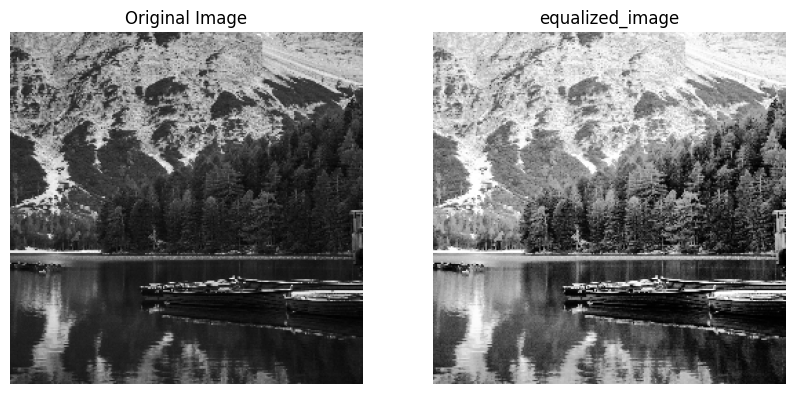

In [ ]:
img7 = im[0]
clear_image = cv2.cvtColor(img7, cv2.COLOR_BGR2GRAY)
# Apply Histogram Equalization
equalized_image = cv2.equalizeHist(clear_image)

# Plotting the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(clear_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('equalized_image')
plt.axis('off')

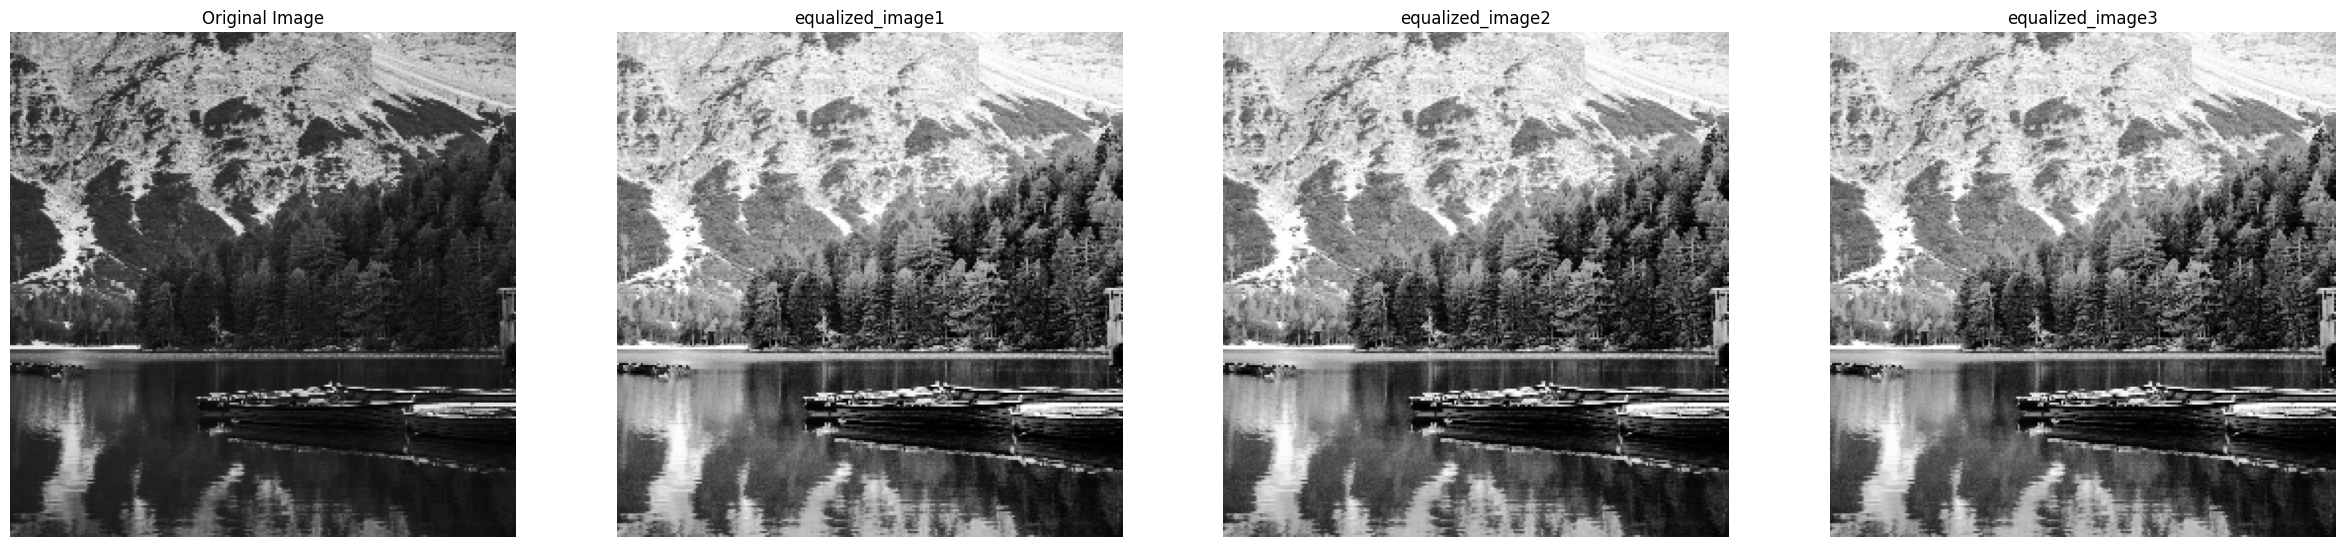

In [ ]:
img7 = im[0]
clear_image = cv2.cvtColor(img7, cv2.COLOR_BGR2GRAY)
# Apply Histogram Equalization
equalized_image1 = cv2.equalizeHist(clear_image)
equalized_image2 = cv2.equalizeHist(equalized_image1)
equalized_imag3 = cv2.equalizeHist(equalized_image2)

# Plotting the images
plt.figure(figsize=(30, 20))

plt.subplot(1, 4, 1)
plt.imshow(clear_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(equalized_image1, cmap='gray')
plt.title('equalized_image1')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(equalized_image2, cmap='gray')
plt.title('equalized_image2')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(equalized_imag3, cmap='gray')
plt.title('equalized_image3')
plt.axis('off')

plt.show()